In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price/1553768847-housing.csv


In [3]:
df = pd.read_csv("/kaggle/input/house-price/1553768847-housing.csv")
is_missing_attr = df.isna()
n_missing_attr = is_missing_attr.sum(axis=1)
df[n_missing_attr > 0]





,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN,220500
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN,167400
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,410700
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN,258100


In [4]:
df.dropna(inplace=True)

island_regs = df[ df["ocean_proximity"] == "ISLAND"]
df.drop(island_regs.index,inplace=True)


# shuffling DS

In [5]:
shuffled = df.sample(frac=1, random_state=1).reset_index(drop=True)
shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-118.18,34.14,38,3039,487.0,1131,465,7.7116,<1H OCEAN,360900
1,-118.19,34.14,38,1826,300.0,793,297,5.2962,<1H OCEAN,291500
2,-117.22,32.85,26,1647,261.0,694,259,4.6875,NEAR OCEAN,274400
3,-119.23,34.19,16,5297,810.0,1489,667,6.4522,NEAR OCEAN,500001
4,-121.24,38.78,18,549,143.0,249,136,0.8691,INLAND,136500
...,...,...,...,...,...,...,...,...,...,...
20423,-117.85,33.84,17,2830,502.0,1370,459,5.1785,<1H OCEAN,247300
20424,-119.85,34.40,14,2307,650.0,5723,615,2.1652,NEAR OCEAN,37500
20425,-118.45,34.08,52,1500,176.0,384,145,7.1576,<1H OCEAN,500001
20426,-116.89,33.93,29,4549,916.0,2494,912,2.0976,INLAND,72600


# splitting

In [6]:

from sklearn.model_selection import train_test_split

trainval, test = train_test_split(shuffled, test_size=0.16, shuffle=False)
train, val = train_test_split(trainval, test_size=0.2, shuffle=False)


df_target_train = train['median_house_value']
train.drop("median_house_value",axis=1,inplace=True)

df_target_test = test['median_house_value']
test.drop("median_house_value",axis=1,inplace=True)

df_target_val = val['median_house_value']
val.drop("median_house_value",axis=1,inplace=True)

In [7]:
len(test),len(train),len(val)
print(val["ocean_proximity"].unique())
print(train["ocean_proximity"].unique()) 
print(test["ocean_proximity"].unique())
# no dataset de trainamento tem um ISLAND que nao tem no test e validation. 





['<1H OCEAN' 'NEAR BAY' 'INLAND' 'NEAR OCEAN']
['<1H OCEAN' 'NEAR OCEAN' 'INLAND' 'NEAR BAY']
['INLAND' '<1H OCEAN' 'NEAR OCEAN' 'NEAR BAY']


# Normaling dataset
splitting data in categorical, ordinal and continuous

In [8]:
display(train)
contin_attr = ["housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
cate_attr = ["ocean_proximity"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.18,34.14,38,3039,487.0,1131,465,7.7116,<1H OCEAN
1,-118.19,34.14,38,1826,300.0,793,297,5.2962,<1H OCEAN
2,-117.22,32.85,26,1647,261.0,694,259,4.6875,NEAR OCEAN
3,-119.23,34.19,16,5297,810.0,1489,667,6.4522,NEAR OCEAN
4,-121.24,38.78,18,549,143.0,249,136,0.8691,INLAND
...,...,...,...,...,...,...,...,...,...
13722,-118.05,33.78,18,3414,434.0,1272,454,8.7015,<1H OCEAN
13723,-122.03,37.83,24,5948,738.0,1997,710,9.8708,NEAR BAY
13724,-120.16,36.96,18,508,104.0,393,114,3.0000,INLAND
13725,-117.90,33.71,16,1917,317.0,1324,351,6.2488,<1H OCEAN


# Normalizing continious values

In [9]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [10]:
dataset = {"train":None, "test":None, "val":None}

scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False)

# Fit the scaler on the training data
scaler.fit(train[contin_attr])

encoder = OneHotEncoder(sparse=False)


def normalizing(df): 
    return scaler.transform(df)

def encoding(df):
    return encoder.fit_transform(df)

In [11]:
train_cont = pd.DataFrame(normalizing(train[contin_attr])) 
train_cat = pd.DataFrame(encoding(train[cate_attr]))
dataset["train"] = pd.concat([train_cont,train_cat],axis=1)

test_cont = pd.DataFrame(normalizing(test[contin_attr])) 
test_cat = pd.DataFrame(encoding(test[cate_attr]))
dataset["test"] = pd.concat([test_cont,test_cat],axis=1)

val_cont = pd.DataFrame(normalizing(val[contin_attr])) 
val_cat = pd.DataFrame(encoding(val[cate_attr]))
dataset["val"] = pd.concat([val_cont,val_cat],axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
len(dataset["train"]),len(dataset["test"]),len(dataset["val"])
dataset["train"]

,0,1,2,3,4,5,0,1,2,3
0,0.747900,0.180566,-0.122450,-0.262351,-0.091969,1.986555,1.0,0.0,0.0,0.0
1,0.747900,-0.370460,-0.562845,-0.563454,-0.528736,0.732046,1.0,0.0,0.0,0.0
2,-0.202614,-0.451774,-0.654692,-0.651647,-0.627529,0.415900,0.0,0.0,0.0,1.0
3,-0.994710,1.206302,0.638232,0.056570,0.433191,1.332449,0.0,0.0,0.0,1.0
4,-0.836290,-0.950560,-0.932588,-1.048070,-0.947304,-1.567297,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13722,-0.836290,0.350916,-0.247268,-0.136742,-0.120567,2.500688,1.0,0.0,0.0,0.0
13723,-0.361033,1.502030,0.468668,0.509115,0.544982,3.107998,0.0,0.0,1.0,0.0
13724,-0.836290,-0.969185,-1.024435,-0.919789,-1.004500,-0.460552,0.0,1.0,0.0,0.0
13725,-0.994710,-0.329122,-0.522809,-0.090419,-0.388347,1.226807,1.0,0.0,0.0,0.0


# dataset

In [13]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np


In [14]:
# Convert numpy arrays to PyTorch tensors
features_tensor = torch.tensor(dataset["train"].to_numpy(),dtype=torch.float32)
target_tensor = torch.tensor(df_target_train.to_numpy(),dtype=torch.float32)

# VALIDATION
val_features_tensor = torch.tensor(dataset["val"].to_numpy(),dtype=torch.float32)
val_target_tensor = torch.tensor(df_target_val.to_numpy(),dtype=torch.float32)


In [15]:
len(target_tensor)

13727

In [16]:
tensor_dataset = TensorDataset(features_tensor, target_tensor)
dataloader = DataLoader(tensor_dataset, batch_size=32, shuffle=True)


#VALIDATION
val_tensor_dataset = TensorDataset(val_features_tensor, val_target_tensor)
val_dataloader = DataLoader(val_tensor_dataset, batch_size=32, shuffle=True)


In [17]:
# Step 4: Iterate through the DataLoader
for batch_features, batch_targets in dataloader:
    print("Batch features:", batch_features)
    print("Batch targets:", batch_targets)
    break  # Just to show the first batch


Batch features: tensor([[ 0.4311,  0.0974,  0.0377,  0.1795,  0.0562, -0.3524,  0.0000,  1.0000,
          0.0000,  0.0000],
        [ 1.8568, -0.4795, -0.3320, -0.3737, -0.4299, -0.9099,  0.0000,  0.0000,
          1.0000,  0.0000],
        [ 0.2726,  0.1083,  1.2341,  1.9781,  1.3717, -0.7802,  1.0000,  0.0000,
          0.0000,  0.0000],
        [-0.9947, -0.5940, -0.3532, -0.2873, -0.2220, -0.0890,  1.0000,  0.0000,
          0.0000,  0.0000],
        [-0.5987,  0.3941,  0.1578,  0.1341,  0.1654, -0.6479,  0.0000,  1.0000,
          0.0000,  0.0000],
        [-0.9947, -0.0116, -0.2755, -0.2989, -0.1960, -0.0494,  0.0000,  1.0000,
          0.0000,  0.0000],
        [ 0.2726, -0.2087, -0.3132, -0.2704, -0.3390, -0.1905,  0.0000,  0.0000,
          0.0000,  1.0000],
        [-0.7571,  0.1179, -0.2214, -0.0102, -0.0660,  0.3915,  0.0000,  1.0000,
          0.0000,  0.0000],
        [ 1.3816, -1.1463, -1.2293,  4.5491, -1.2671,  0.1959,  0.0000,  0.0000,
          0.0000,  1.0000],
   

# Linear Regression

In [18]:
import torch.nn as nn

torch.manual_seed(13)
linear = nn.Linear(in_features=10, out_features=1, bias=True)

model = nn.Sequential()
model.add_module('layer1', linear)
model.state_dict(),list(model.parameters())


(OrderedDict([('layer1.weight',
               tensor([[-0.2582, -0.0130,  0.1964, -0.3067, -0.3065,  0.0655, -0.1696,  0.2298,
                         0.3073, -0.1913]])),
              ('layer1.bias', tensor([-0.2637]))]),
 [Parameter containing:
  tensor([[-0.2582, -0.0130,  0.1964, -0.3067, -0.3065,  0.0655, -0.1696,  0.2298,
            0.3073, -0.1913]], requires_grad=True),
  Parameter containing:
  tensor([-0.2637], requires_grad=True)])

In [19]:
bad_predictions = model(batch_features)
bad_predictions

tensor([[-0.2345],
        [-0.3079],
        [-1.3410],
        [-0.0879],
        [ 0.0122],
        [ 0.3174],
        [-0.4099],
        [ 0.1655],
        [-2.0320],
        [-0.2542],
        [ 0.3004],
        [-0.1425],
        [-0.6898],
        [-0.2881],
        [ 0.4591],
        [-0.5637],
        [-0.8124],
        [-0.2965],
        [ 0.7419],
        [ 0.2240],
        [ 0.0168],
        [ 0.4426],
        [-0.1405],
        [-0.4516],
        [-0.0835],
        [-0.9475],
        [-0.6975],
        [ 0.2635],
        [ 0.6108],
        [-1.7950],
        [-0.5912],
        [-0.1640]], grad_fn=<AddmmBackward0>)

In [20]:
bad_predictions - batch_targets


tensor([[ -76200.2344, -140600.2344, -258300.2344,  ..., -163900.2344,
         -257400.2344,  -62800.2344],
        [ -76200.3047, -140600.3125, -258300.3125,  ..., -163900.3125,
         -257400.3125,  -62800.3086],
        [ -76201.3438, -140601.3438, -258301.3438,  ..., -163901.3438,
         -257401.3438,  -62801.3398],
        ...,
        [ -76201.7969, -140601.7969, -258301.7969,  ..., -163901.7969,
         -257401.7969,  -62801.7969],
        [ -76200.5938, -140600.5938, -258300.5938,  ..., -163900.5938,
         -257400.5938,  -62800.5898],
        [ -76200.1641, -140600.1562, -258300.1562,  ..., -163900.1562,
         -257400.1562,  -62800.1641]], grad_fn=<SubBackward0>)

## Loss - MSE

In [21]:
loss_fn = nn.MSELoss()
loss = loss_fn(bad_predictions, batch_targets)
loss

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(4.1753e+10, grad_fn=<MseLossBackward0>)

In [22]:
# aplicando o gradient descent automatico
loss.backward()
model.layer1.weight.grad, model.layer1.bias.grad
# -470863.1250 é uma tx de erro muito menor que 6.6361e+10

(tensor([[ -32925.4141,   60026.0977,   31145.0215,  -62854.4180,   38198.3672,
            75824.8672,  -89522.2344, -145472.9375,  -55951.2266,  -67141.7344]]),
 tensor([-358088.0625]))

# Optimizer 

In [23]:
import torch.optim as optim
optimizer = optim.Adam(params=model.parameters(), lr=1.1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [24]:
n_epochs = 100
losses = torch.empty(n_epochs) 

model.to(device) 

Sequential(
  (layer1): Linear(in_features=10, out_features=1, bias=True)
)

In [25]:
for epoch in range(n_epochs):
    batch_losses = torch.empty(len(dataloader)) 
    #print(epoch)
    for i, (batch_features, batch_targets) in enumerate(dataloader):
        model.train()
        batch_features = batch_features.to(device)
        batch_targets = batch_targets.to(device) 

        # Step 1 - forward pass
        predictions = model(batch_features) 

        # Step 2 - computing the loss
        loss = loss_fn(predictions, batch_targets) 

        # Step 3 - computing the gradients
        loss.backward()
        batch_losses[i] = loss.item() 

        # Step 4 - updating parameters and zeroing gradients
        optimizer.step()
        optimizer.zero_grad() 

    losses[epoch] = batch_losses.mean()

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([31])) that is different to the input size (torch.Size([31, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## Mostrando a curva de aprendizado. Entre 900 e 1000 comecou a entrar em flat. 

Text(0.5, 1.0, 'Training Loss')

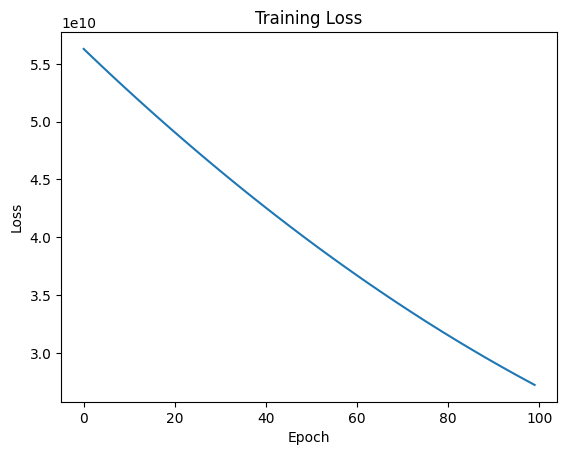

In [26]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

In [27]:
n_epochs = 200
losses = torch.empty(n_epochs) 
val_losses = torch.empty(n_epochs) 
model.to(device) 

Sequential(
  (layer1): Linear(in_features=10, out_features=1, bias=True)
)

In [28]:
for epoch in range(n_epochs):
    batch_losses = torch.empty(len(dataloader)) 
    #print(epoch)
    for i, (batch_features, batch_targets) in enumerate(dataloader):
        model.train()
        batch_features = batch_features.to(device)
        batch_targets = batch_targets.to(device) 

        # Step 1 - forward pass
        predictions = model(batch_features) 

        # Step 2 - computing the loss
        loss = loss_fn(predictions, batch_targets) 

        # Step 3 - computing the gradients
        loss.backward()
        batch_losses[i] = loss.item() 

        # Step 4 - updating parameters and zeroing gradients
        optimizer.step()
        optimizer.zero_grad() 

    losses[epoch] = batch_losses.mean()
    
    ## VALIDATION
    batch_losses = torch.empty(len(val_dataloader)) 
    
    with torch.inference_mode():
        for i, (val_features, val_targets) in enumerate(val_dataloader):
            # Sprinkle
            model.eval() # Chamando o Eval() para ativar o evaluation

            val_features= val_features.to(device)
            val_targets = val_targets.to(device) 

            # Step 1 - forward pass
            predictions = model(val_features) 

            # Step 2 - computing the loss
            loss = loss_fn(predictions, val_targets)
            batch_losses[i] = loss.item() 

    val_losses[epoch] = batch_losses.mean()

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


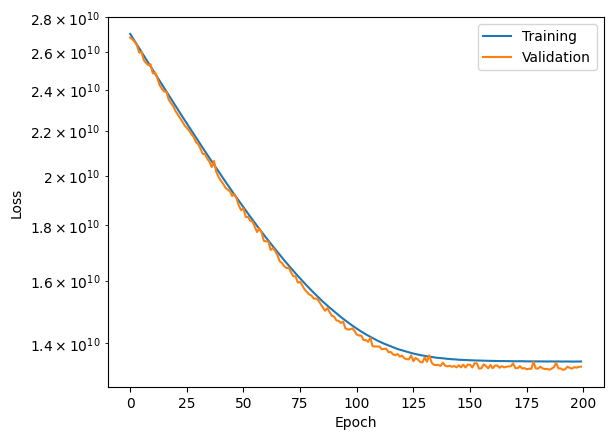

In [29]:
plt.plot(losses, label='Training')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()

# Usando ReLu - Non-linear activation function

In [38]:
tensor_dataset = TensorDataset(features_tensor, target_tensor)
dataloader = DataLoader(tensor_dataset, batch_size=32, shuffle=True)


#VALIDATION
val_tensor_dataset = TensorDataset(val_features_tensor, val_target_tensor)
val_dataloader = DataLoader(val_tensor_dataset, batch_size=32, shuffle=True)


In [42]:
import torch.nn as nn
from tqdm import tqdm

# 1 criando o modelo:

torch.manual_seed(13)
linear = nn.Linear(in_features=10, out_features=1, bias=True)

model = nn.Sequential(nn.ReLU())
model.add_module('layer1', linear)
model.state_dict(),list(model.parameters()) 

# 2. Criando loss function
loss_fn = nn.MSELoss()

# 3. Optmizer
import torch.optim as optim
optimizer = optim.Adam(params=model.parameters(), lr=1.1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


# 4. Definindo epocas
n_epochs = 400
losses = torch.empty(n_epochs) 
val_losses = torch.empty(n_epochs) 
model.to(device) 

progress_bar = tqdm(range(n_epochs))

for epoch in progress_bar:
    batch_losses = torch.empty(len(dataloader)) 
    #print(epoch)
    for i, (batch_features, batch_targets) in enumerate(dataloader):
        model.train()
        batch_features = batch_features.to(device)
        batch_targets = batch_targets.to(device) 

        # Step 1 - forward pass
        predictions = model(batch_features) 

        # Step 2 - computing the loss
        loss = loss_fn(predictions, batch_targets) 

        # Step 3 - computing the gradients
        loss.backward()
        batch_losses[i] = loss.item() 

        # Step 4 - updating parameters and zeroing gradients
        optimizer.step()
        optimizer.zero_grad() 

    losses[epoch] = batch_losses.mean()
    
    ## VALIDATION
    batch_losses = torch.empty(len(val_dataloader)) 
    
    with torch.inference_mode():
        for i, (val_features, val_targets) in enumerate(val_dataloader):
            # Sprinkle
            model.eval() # Chamando o Eval() para ativar o evaluation

            val_features= val_features.to(device)
            val_targets = val_targets.to(device) 

            # Step 1 - forward pass
            predictions = model(val_features) 

            # Step 2 - computing the loss
            loss = loss_fn(predictions, val_targets)
            batch_losses[i] = loss.item() 

    val_losses[epoch] = batch_losses.mean()

    


    

cuda


100%|██████████| 400/400 [04:28<00:00,  1.49it/s]


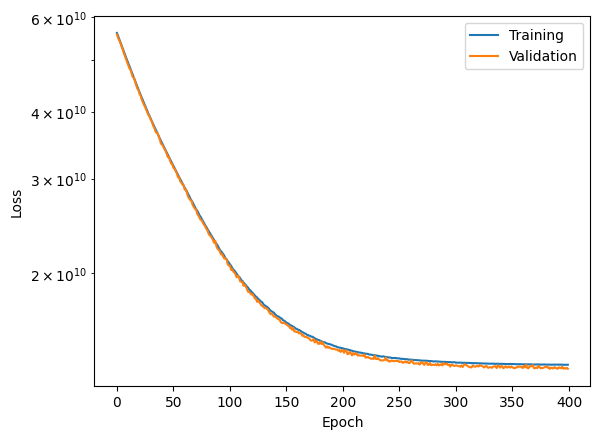

In [43]:
plt.plot(losses, label='Training')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()